# **1. Introduction to Support Vector Machine (SVM)**

## **What is Support Vector Machine (SVM)?**
Support Vector Machine (SVM) is a **supervised machine learning algorithm** used for:
- **Classification** (binary and multi-class).
- **Regression** (Support Vector Regression, SVR).

### **Key Features of SVM:**
‚úî **Primarily used for binary classification** but can be extended to multi-class.  
‚úî **Finds an optimal decision boundary (hyperplane)** that maximizes the separation between different classes.  
‚úî Works well for **high-dimensional spaces** and **small datasets**.  

---

## **2. How SVM Works?**
SVM **finds a hyperplane** in an **N-dimensional space** (where $ N $ is the number of features) that distinctly classifies the data points.

### **Goal of SVM:**
- **Find the optimal hyperplane** that maximizes the margin between the nearest points of different classes.
- These **nearest points** are called **Support Vectors**.

---

### **Mathematical Representation**
Given a dataset $ (x_i, y_i) $ where $ x_i $ represents input features and $ y_i $ represents labels ($-1$ or $+1$), SVM aims to find a hyperplane:

$
w \cdot x + b = 0
$

where:
- $ w $ is the weight vector.
- $ x $ is the input feature vector.
- $ b $ is the bias term.

The **decision boundary** is chosen such that the **margin** (distance between the hyperplane and support vectors) is **maximized**:

$
\max \frac{2}{||w||}
$

subject to:

$
y_i (w \cdot x_i + b) \geq 1, \quad \forall i
$

- If data is **linearly separable**, SVM finds a straight line (in 2D) or a hyperplane (in higher dimensions).
- If data is **not linearly separable**, SVM can use **kernel tricks** to transform data into a higher-dimensional space.

---

## **3. Example: SVM for 2D Binary Classification**
In a **2D dataset**, SVM finds a **straight line** that separates two classes with the **largest possible margin**.

### **Python Implementation of SVM (Using Scikit-Learn)**
```python


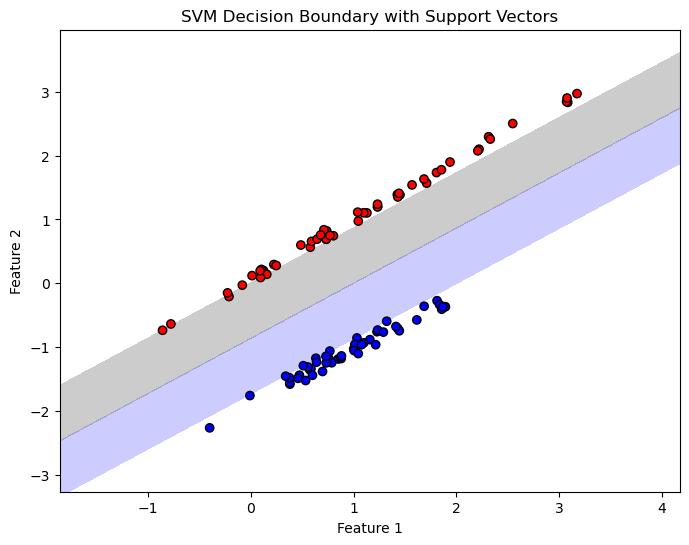

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a toy dataset (2D binary classification)
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_clusters_per_class=1, random_state=42)

y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(8,6))

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'black', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary with Support Vectors")
plt.show()

# **3. Kernel Trick and SVM Variants**

## **What if the Data is Not Linearly Separable?**
- If data **cannot be separated** by a straight line, we transform it into a **higher-dimensional space**.
- Instead of computing new feature mappings explicitly, we use the **kernel trick**.
- The **kernel trick** computes inner products in the new space **without explicitly transforming the data**.

---

## **1. Common Kernel Functions**
### **1.1 Linear Kernel**
$
K(x_i, x_j) = x_i \cdot x_j
$

‚úî Used when **data is linearly separable**.  
‚úî Equivalent to a **standard SVM without feature mapping**.

---

### **1.2 Polynomial Kernel**
$
K(x_i, x_j) = (x_i \cdot x_j + c)^d
$

‚úî Adds **polynomial interaction features** between data points.  
‚úî Works when data **has slight curvature**.

---

### **1.3 Radial Basis Function (RBF) Kernel**
$
K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
$

‚úî Maps data into **an infinite-dimensional space**.  
‚úî Works **well for complex, nonlinear decision boundaries**.

---

### **1.4 Sigmoid Kernel**
$
K(x_i, x_j) = \tanh(\alpha x_i \cdot x_j + c)
$

‚úî Similar to activation functions in **neural networks**.  
‚úî Less commonly used in practice.

---

## **2. Python Implementation: SVM with Different Kernels**
```python


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a nonlinear dataset
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {kernel: SVC(kernel=kernel, gamma='auto').fit(X_train, y_train) for kernel in kernels}

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    model = models[kernel]
    
    # Create grid
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                         np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    axes[idx].set_title(f"SVM with {kernel} kernel")
    axes[idx].set_xlabel("Feature 1")
    axes[idx].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# **4. Hyperparameters of SVM**

SVM has several **hyperparameters** that affect its performance. Proper tuning is essential for **optimal classification results**.

---

## **1. Regularization Parameter (C)**
The **C parameter** controls the **trade-off between margin size and misclassification**.

- **High C** ‚Üí **Less margin, fewer misclassifications** (strict decision boundary).
- **Low C** ‚Üí **Larger margin, more misclassifications** (more flexible decision boundary).

### **Mathematical Formulation**
SVM minimizes:

$
\frac{1}{2} ||w||^2 + C \sum \xi_i
$

where:
- $ ||w||^2 $ controls **margin size**.
- $ \xi_i $ are **slack variables** for misclassified points.
- **C balances** the trade-off between margin width and misclassification.

---

## **2. Kernel Type**
The **kernel function** determines how SVM maps data into higher dimensions.

‚úî **Linear** ‚Üí Use when data is **linearly separable**.  
‚úî **Polynomial** ‚Üí Useful when data has **nonlinear patterns**.  
‚úî **RBF (Radial Basis Function)** ‚Üí Works well for **most nonlinear datasets**.  
‚úî **Sigmoid** ‚Üí Inspired by neural networks, but less commonly used.

---

## **3. Gamma (Œ≥) Parameter**
The **gamma (Œ≥) parameter** controls the impact of a **single training example** in non-linear kernels like **RBF and Polynomial**.

- **High Œ≥** ‚Üí **Only close points influence the decision boundary**.
- **Low Œ≥** ‚Üí **Distant points also influence the boundary**, creating smoother decision regions.

### **Mathematical Formulation**
For the **RBF kernel**, Œ≥ appears in:

$
K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
$

where:
- **High Œ≥** ‚Üí Focuses on **nearby points**.
- **Low Œ≥** ‚Üí Considers **distant points**.

---

## **4. Python Implementation: Effect of C and Gamma**
```python


# **5. Choosing the Right Hyperparameters in SVM**

Proper tuning of **SVM hyperparameters** significantly impacts model performance. The main hyperparameters are **C (Regularization), Gamma (Œ≥), and Kernel Type**.

---

## **Hyperparameter Effects and When to Use Them**

| **Hyperparameter** | **Effect** | **When to Use** |
|-------------------|------------|---------------|
| **C (Regularization Parameter)** | **Low C** ‚Üí More misclassifications, smoother boundary <br> **High C** ‚Üí Fewer misclassifications, strict boundary | **Small C** when data is noisy <br> **Large C** for fewer misclassifications |
| **Gamma (Œ≥) (Only for RBF/Polynomial Kernels)** | **Low Œ≥** ‚Üí Large influence area, smoother decision boundary <br> **High Œ≥** ‚Üí Small influence area, more complex decision regions | **Small Œ≥** for generalization and smooth boundaries <br> **Large Œ≥** for complex patterns |
| **Kernel Type** | **Linear** for simple data <br> **Polynomial/RBF** for nonlinear data | **Use RBF when unsure** (it works well in most cases) |

---

## **1. Understanding C (Regularization Parameter)**
- **C controls the trade-off** between **margin size and misclassification**.
- **Low C** ‚Üí Larger margin, more misclassification.
- **High C** ‚Üí Smaller margin, fewer misclassifications.

### **Mathematical Formulation**
SVM minimizes:

$
\frac{1}{2} ||w||^2 + C \sum \xi_i
$

where:
- \( ||w||^2 \) controls **margin size**.
- \( \xi_i \) are **slack variables** for misclassified points.
- **C balances** the trade-off between **margin width and classification error**.

---

## **2. Understanding Gamma (Œ≥)**
- **Gamma controls the influence of training points** in **nonlinear kernels**.
- **Low Œ≥** ‚Üí A training point influences **distant** regions.
- **High Œ≥** ‚Üí A training point only affects **nearby** points.

For the **Radial Basis Function (RBF) Kernel**, Œ≥ appears in:

$
K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
$

where:
- **High Œ≥** ‚Üí Focuses on **close** data points.
- **Low Œ≥** ‚Üí Considers **distant** data points.

---

## **3. Choosing the Right Kernel**
- **Linear Kernel** ‚Üí When data is **linearly separable**.
- **Polynomial Kernel** ‚Üí When data has slight **nonlinearity**.
- **RBF Kernel** ‚Üí Best for **complex, nonlinear data**.

If **unsure**, use the **RBF kernel**, as it works well in most cases.

---

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different hyperparameter values
C_values = [0.1, 1, 100]
gamma_values = [0.01, 1, 10]

# Plot decision boundaries for different C and gamma values
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 10))
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)

        # Create grid
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                             np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot decision boundary
        axes[i, j].contourf(xx, yy, Z, alpha=0.3)
        axes[i, j].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
        axes[i, j].set_title(f"C={C}, Œ≥={gamma}")

plt.tight_layout()
plt.show()

# **5. SVM vs. Other Classifiers**

Different machine learning classifiers have distinct strengths and weaknesses. The **Support Vector Machine (SVM)** algorithm is widely used for classification tasks, but how does it compare to other popular classifiers?

---

## **Comparison of SVM with Logistic Regression, Decision Trees, and k-NN**

| **Feature**              | **SVM**                    | **Logistic Regression** | **Decision Tree**    | **k-NN**                |
|-------------------------|--------------------------|------------------------|----------------------|-------------------------|
| **Works on Large Data**  | ‚ùå No (computationally expensive) | ‚úÖ Yes                  | ‚úÖ Yes                | ‚ùå No (high memory usage) |
| **Works on Nonlinear Data** | ‚úÖ Yes (with kernel trick) | ‚ùå No (linear decision boundary) | ‚úÖ Yes                | ‚úÖ Yes                     |
| **Computationally Efficient** | ‚ùå No (slow for large datasets) | ‚úÖ Yes (fast optimization) | ‚úÖ Yes (fast training) | ‚ùå No (slow in testing phase) |
| **Handles Outliers Well** | ‚ùå No (sensitive to outliers) | ‚ùå No (influenced by extreme values) | ‚úÖ Yes (pruning helps) | ‚ùå No (distance-based, affected by noise) |

---

## **1. When to Use SVM?**
‚úî Works well for **small-to-medium datasets**.  
‚úî Effective for **high-dimensional data** (e.g., text classification).  
‚úî Best when the **decision boundary is clear but complex**.  
‚úî Use **RBF or polynomial kernel** when data is **non-linearly separable**.  

---

## **2. When to Choose Other Classifiers?**
- **Logistic Regression** ‚Üí Best for **large datasets** with **linearly separable** data.
- **Decision Tree** ‚Üí Works well for **nonlinear relationships** and **interpretable models**.
- **k-NN (k-Nearest Neighbors)** ‚Üí Best for **small datasets** but slow for large-scale data.

---

## **3. Key Takeaways**
‚úî **SVM is powerful but computationally expensive**.  
‚úî **Kernel trick makes SVM highly flexible** for **nonlinear data**.  
‚úî **Decision Trees are faster and more interpretable**.  
‚úî **k-NN is easy to implement but slow for large datasets**.  

Would you like a **Python implementation comparing SVM with other classifiers?** üöÄ

# **3. When to Use Different Kernels in SVM?**

The **choice of kernel** significantly impacts SVM performance, especially when data is **not linearly separable**. Below is a comparison of commonly used kernels, their use cases, advantages, and disadvantages.

---

## **Kernel Selection Guide**

| **Kernel**        | **Use Case** | **Advantages** | **Disadvantages** |
|------------------|-------------|---------------|------------------|
| **Linear**      | When data is **linearly separable** | ‚úÖ Fast, interpretable | ‚ùå Cannot model **nonlinear patterns** |
| **Polynomial**  | When data has **slight curvature** | ‚úÖ Captures **feature interactions** | ‚ùå Computationally **expensive** |
| **RBF (Gaussian)** | When data has **complex, nonlinear boundaries** | ‚úÖ Works well in **most cases** | ‚ùå Requires careful tuning of **gamma (Œ≥)** |
| **Sigmoid** | Inspired by **neural networks** | ‚úÖ Similar to **neural network activations** | ‚ùå Not commonly used, less interpretable |

---

## **1. Linear Kernel**
$
K(x_i, x_j) = x_i \cdot x_j
$

‚úî Works well when **data is linearly separable**.  
‚úî Fast and **computationally efficient**.  
‚ùå **Fails on nonlinear data**.

---

## **2. Polynomial Kernel**
$
K(x_i, x_j) = (x_i \cdot x_j + c)^d
$

‚úî Captures **interaction terms** between features.  
‚úî Can model **curved decision boundaries**.  
‚ùå **High-degree polynomials** can cause **overfitting**.  
‚ùå Computationally **expensive**.

---

## **3. RBF (Gaussian) Kernel**
$
K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)
$

‚úî **Best choice for most cases**, especially **nonlinear data**.  
‚úî Maps data into **infinite-dimensional space**.  
‚ùå Requires careful tuning of **gamma (Œ≥)** to **avoid overfitting or underfitting**.

---

## **4. Sigmoid Kernel**
$
K(x_i, x_j) = \tanh(\alpha x_i \cdot x_j + c)
$

‚úî Inspired by **neural network activation functions**.  
‚úî Useful in **some deep learning-inspired models**.  
‚ùå Not commonly used in SVM because other kernels (like RBF) perform better.

---

## **5. Python Implementation: Comparing Kernels**


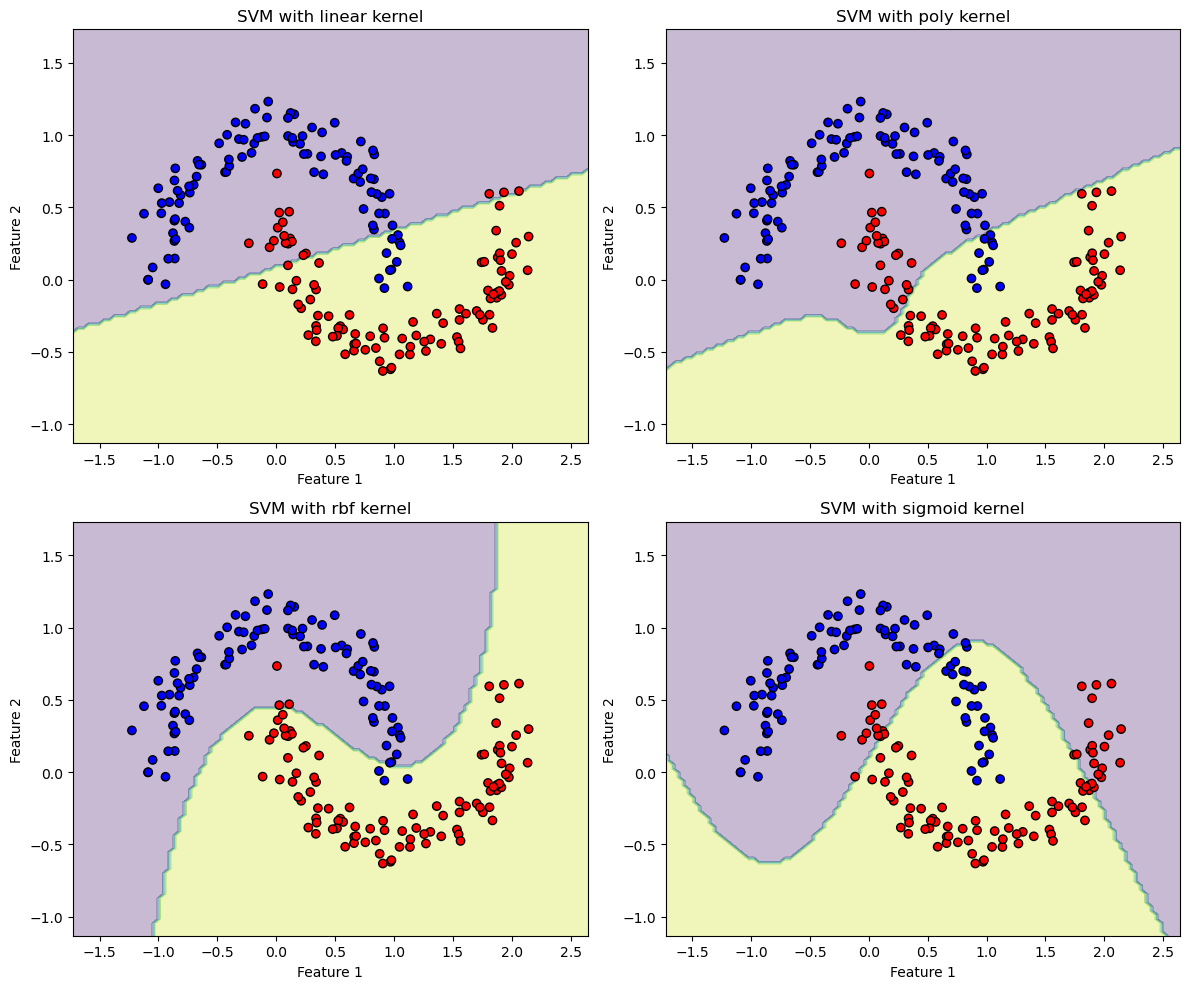

In [24]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset
X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {kernel: SVC(kernel=kernel, gamma='auto').fit(X_train, y_train) for kernel in kernels}

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    model = models[kernel]
    
    # Create grid
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                         np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    axes[idx].set_title(f"SVM with {kernel} kernel")
    axes[idx].set_xlabel("Feature 1")
    axes[idx].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# **6. Advantages and Disadvantages of SVM**

Support Vector Machines (**SVM**) is a powerful classification algorithm, but like any model, it has **pros and cons**.

---

## **Advantages of SVM ‚úÖ**
‚úî **Effective in high-dimensional spaces** ‚Üí Works well when **number of features is large** (e.g., text classification, bioinformatics).  
‚úî **Works well for small to medium-sized datasets** ‚Üí Handles **limited training data** efficiently.  
‚úî **Works well for both linear and nonlinear problems** ‚Üí Can be **extended with kernel tricks**.  
‚úî **Robust to overfitting** (if **C and kernel are tuned properly**).  
‚úî **Good for cases where decision boundary is well-defined**.  

---

## **Disadvantages of SVM ‚ùå**
‚ùå **Computationally expensive for large datasets** ‚Üí Training time increases **quadratically with dataset size**.  
‚ùå **Choice of kernel and hyperparameters requires tuning** ‚Üí **C, gamma, and kernel selection** impact performance.  
‚ùå **Does not perform well on noisy data** ‚Üí Sensitive to **outliers** and overlapping classes.  
‚ùå **Difficult to interpret** ‚Üí Unlike decision trees, SVMs do not provide **human-readable decision rules**.  

---

## **1. When to Use SVM?**
- **When the dataset is small or medium-sized**.
- **When the number of features is large** (e.g., text classification).
- **When data is not linearly separable**, and kernel tricks can help.

## **2. When to Avoid SVM?**
- **When working with large datasets** ‚Üí Consider **Logistic Regression or Random Forest** instead.
- **When training speed is a concern** ‚Üí SVMs can be **computationally expensive**.
- **When dataset is very noisy** ‚Üí SVM **suffers in the presence of overlapping classes**.

---

## **3. Key Takeaways**
‚úî **SVM is powerful for small, high-dimensional datasets**.  
‚úî **Kernel selection and hyperparameter tuning are crucial**.  
‚úî **Not ideal for large datasets due to slow training time**.  
‚úî **Works best when decision boundary is well-defined**.  

Would you like a **performance comparison of SVM vs. other classifiers (Logistic Regression, Decision Tree, k-NN)?** üöÄ